<a href="https://colab.research.google.com/github/nalyzhang/MO/blob/main/lab2_2373_Panina_AL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nalyzhang","key":"ba24fba2eeab9f621e8d2840dd5e8f3d"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                      Student Performance Factors                         94KB  2024-09-02 10:53:57          32405        575  1.0              
mafzal19/electric-vehicle-sales-by-state-in-india            Electric Vehicle Sales by State in India           453KB  2024-10-11 18:59:45           1207         27  1.0              
ka66ledata/gym-membership-dataset                            Gym Membership Dataset                              24KB  2024-10-14 06:48:29           1209         23  1.0              
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage

In [1]:
! kaggle datasets download -d waqi786/remote-work-and-mental-health

Dataset URL: https://www.kaggle.com/datasets/waqi786/remote-work-and-mental-health
License(s): apache-2.0
  0% 0.00/93.0k [00:00<?, ?B/s]
100% 93.0k/93.0k [00:00<00:00, 57.4MB/s]


In [2]:
! unzip "remote-work-and-mental-health.zip"

Archive:  remote-work-and-mental-health.zip
  inflating: Impact_of_Remote_Work_on_Mental_Health.csv  


In [3]:
import pandas as pd

df = pd.read_csv('Impact_of_Remote_Work_on_Mental_Health.csv')
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,Medium,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,Medium,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,Medium,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,High,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,High,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America


1. Добавим новый атрибут "Starting_age", который будет показывать, в каком возрасте человек начал работать.

In [4]:
df['Starting_age'] = df.apply(lambda x: x['Age'] - x['Years_of_Experience'], axis=1)
df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Starting_age
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,...,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,19
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,...,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,37
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,...,Anxiety,No,No Change,4,Unsatisfied,5,NaN,Poor,North America,37
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,...,Depression,Yes,Increase,3,Unsatisfied,3,NaN,Poor,Europe,7
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,...,NaN,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,17


2. Удалим выбросы и дубли, обработаем пропущенные значения

In [5]:
duplicate = df[df.duplicated()]
duplicate.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Starting_age


Дублей в датасете нет

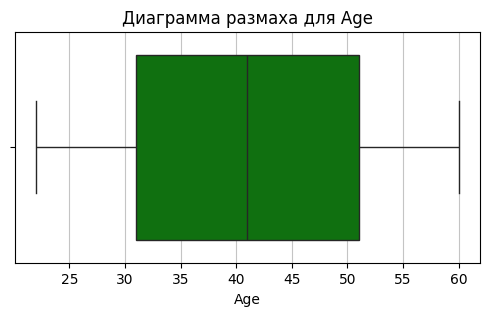

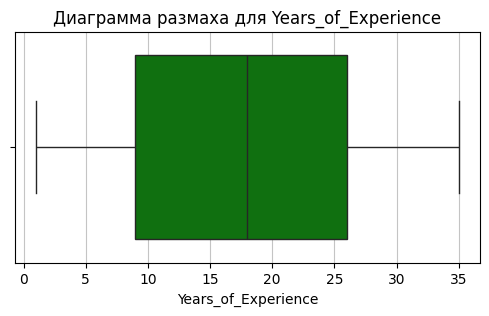

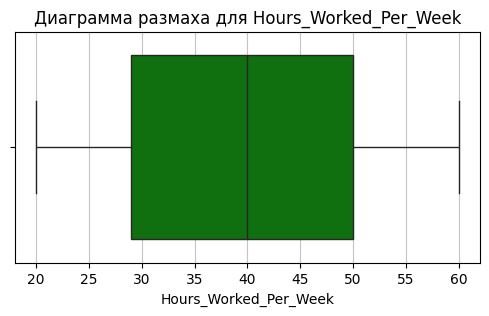

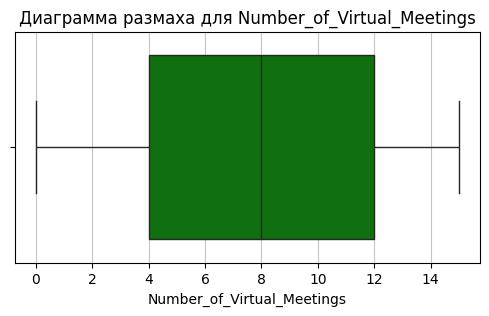

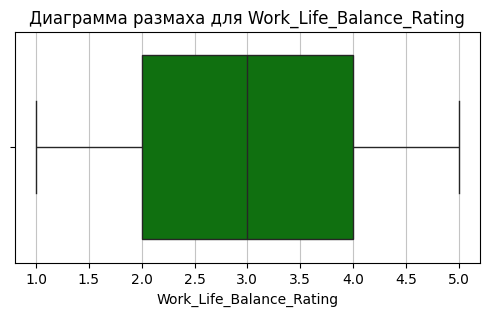

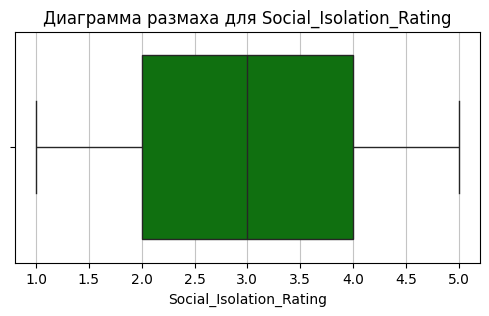

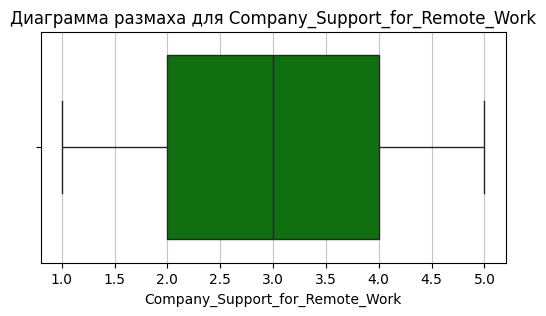

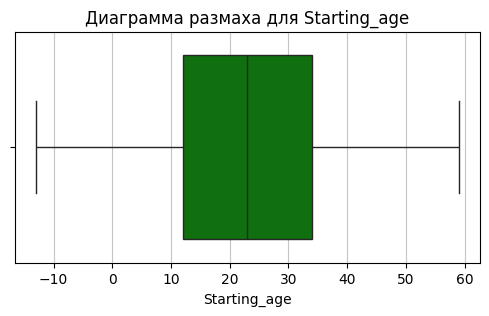

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

num_list = ['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating', 'Social_Isolation_Rating', 'Company_Support_for_Remote_Work', 'Starting_age']

for num in num_list:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[num], color='green')
    plt.title(f'Диаграмма размаха для {num}')
    plt.xlabel(num)
    plt.grid(axis='x', alpha=0.75)
    plt.show()

Выбросов нет

In [8]:
df.isna().sum()

,0
Employee_ID,0
Age,0
Gender,0
Job_Role,0
Industry,0
Years_of_Experience,0
Work_Location,0
Hours_Worked_Per_Week,0
Number_of_Virtual_Meetings,0
Work_Life_Balance_Rating,0


Пропущенные значения есть в атрибутах Mental_Health_Condition и Physical_Activity.
Разберемся с атрибутом Mental_Health_Condition: он описывает состояние ментального здоровья, то есть при отсутствии данных стоит написать не определено, то есть "Not defined".
Теперь с атрибутом Physical_Activity: он описывает уровень физической активность, тогда при отсутствии данных можно указать не занимается - "Not engaged in" - ведь если человек не указывает в поле, как и когда он занимается, он не занимается вовсе.

In [12]:
df['Mental_Health_Condition'] = df['Mental_Health_Condition'].fillna("Not defined")
df['Physical_Activity'] = df['Physical_Activity'].fillna("Not engaged in")

df.head()

,Employee_ID,Age,Gender,Job_Role,Industry,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,...,Mental_Health_Condition,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,Company_Support_for_Remote_Work,Physical_Activity,Sleep_Quality,Region,Starting_age
0,EMP0001,32,Non-binary,HR,Healthcare,13,Hybrid,47,7,2,...,Depression,No,Decrease,1,Unsatisfied,1,Weekly,Good,Europe,19
1,EMP0002,40,Female,Data Scientist,IT,3,Remote,52,4,1,...,Anxiety,No,Increase,3,Satisfied,2,Weekly,Good,Asia,37
2,EMP0003,59,Non-binary,Software Engineer,Education,22,Hybrid,46,11,5,...,Anxiety,No,No Change,4,Unsatisfied,5,Not engaged in,Poor,North America,37
3,EMP0004,27,Male,Software Engineer,Finance,20,Onsite,32,8,4,...,Depression,Yes,Increase,3,Unsatisfied,3,Not engaged in,Poor,Europe,7
4,EMP0005,49,Male,Sales,Consulting,32,Onsite,35,12,2,...,Not defined,Yes,Decrease,3,Unsatisfied,3,Weekly,Average,North America,17


3.Построим графики зависимостей одной переменной от другой

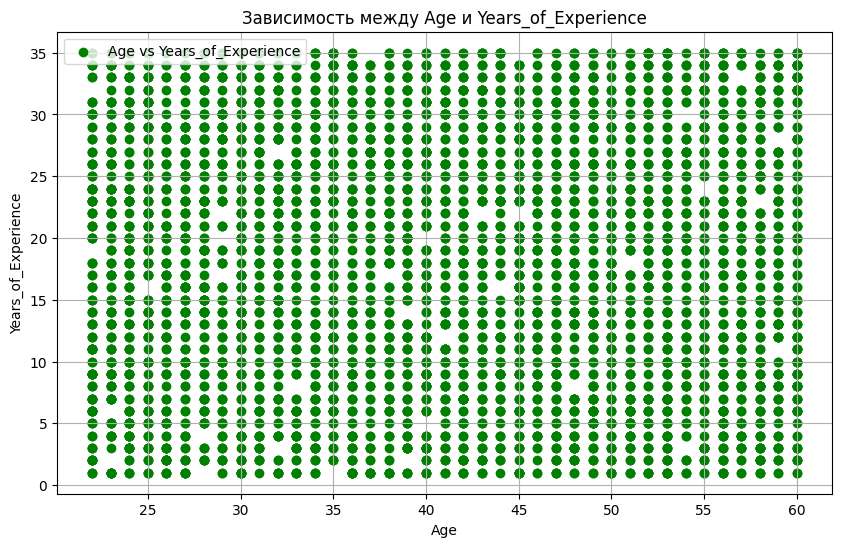

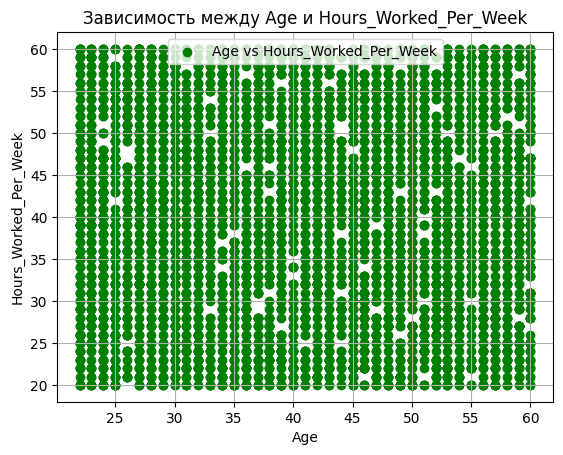

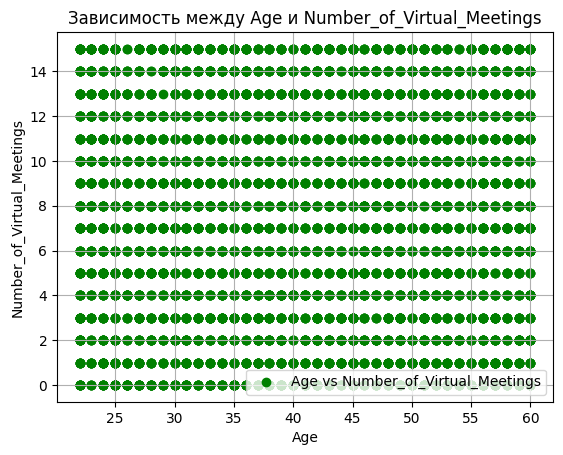

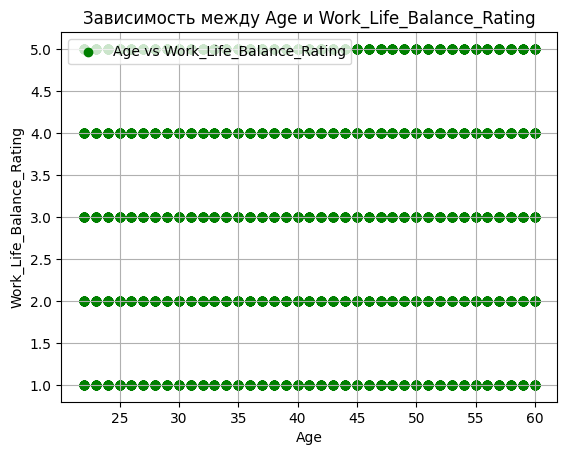

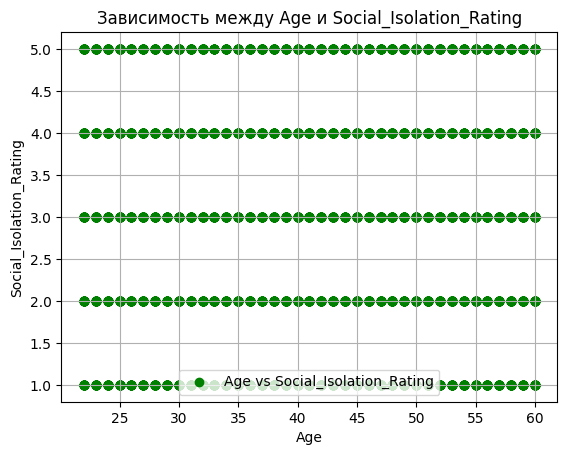

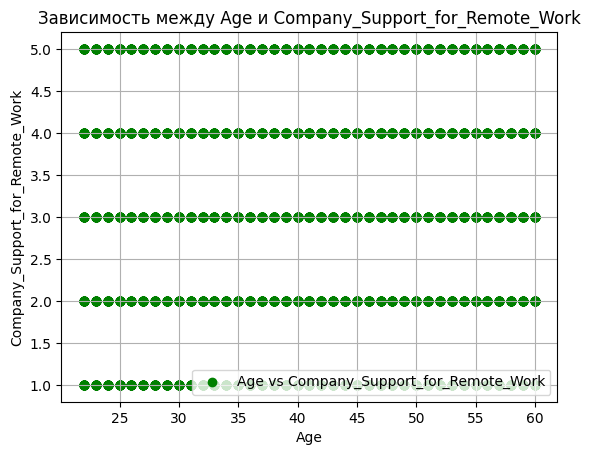

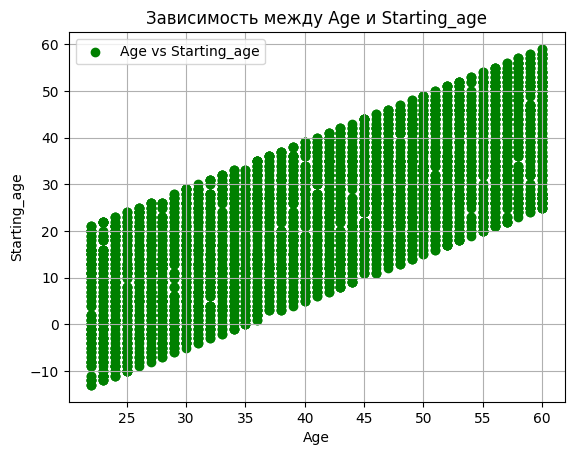

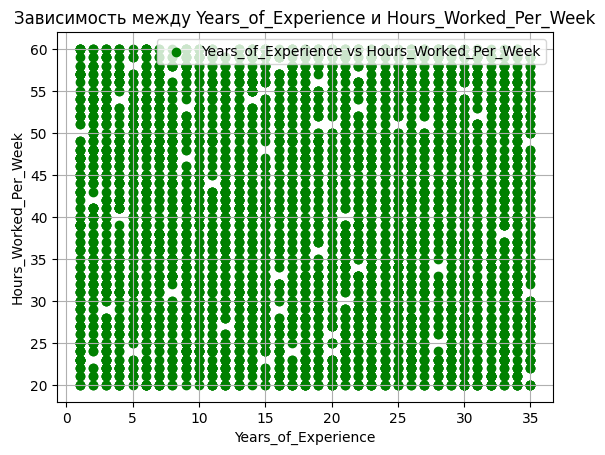

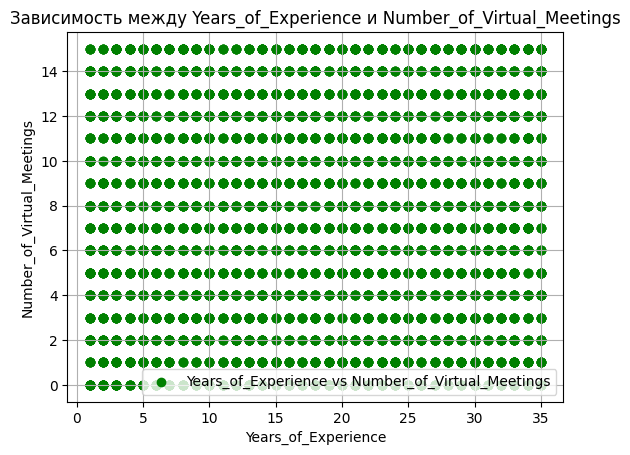

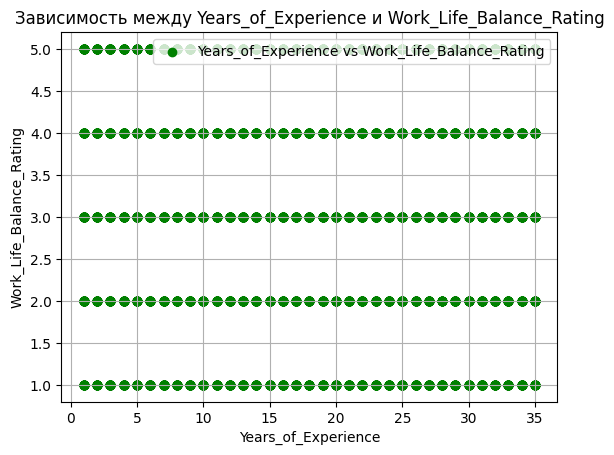

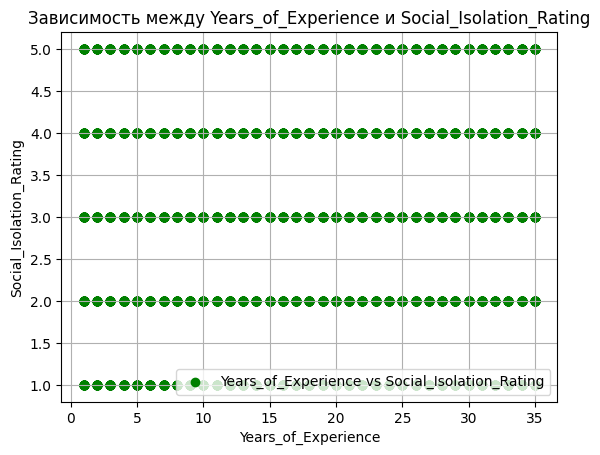

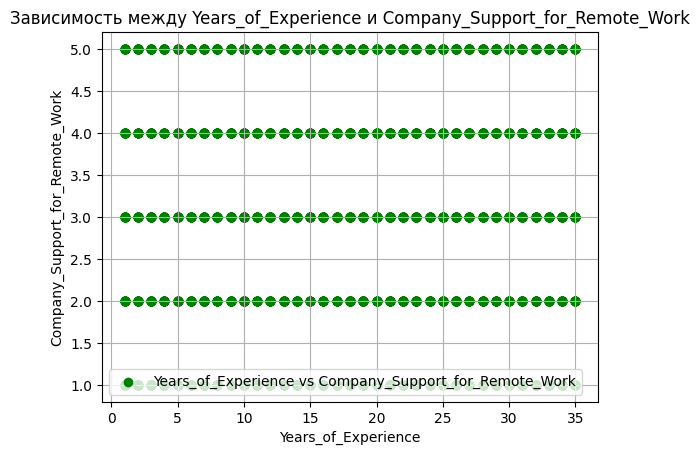

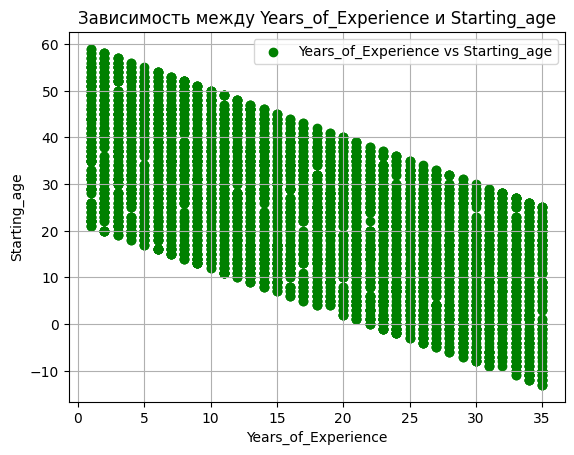

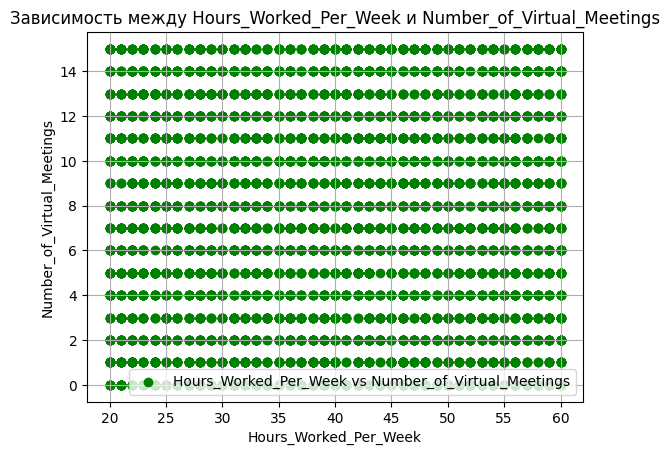

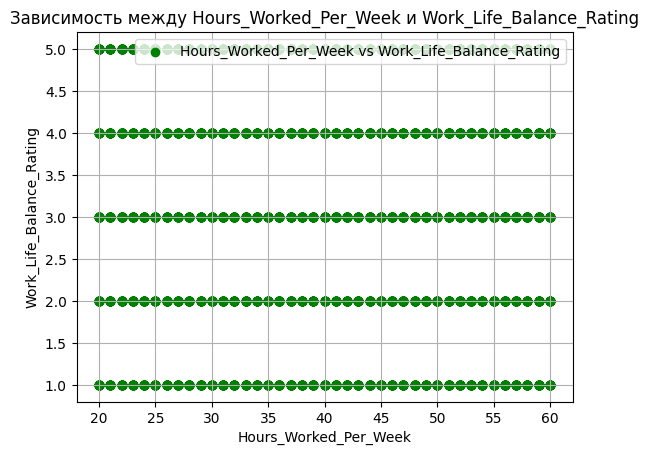

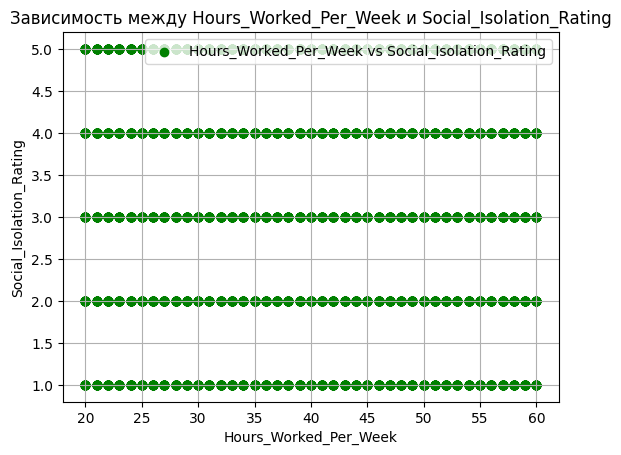

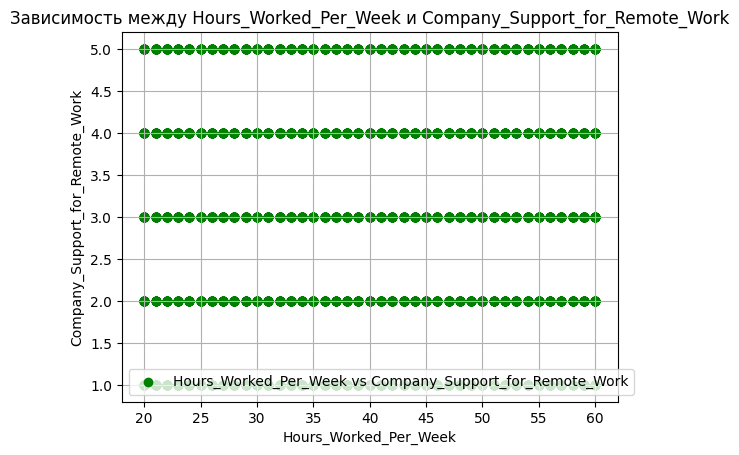

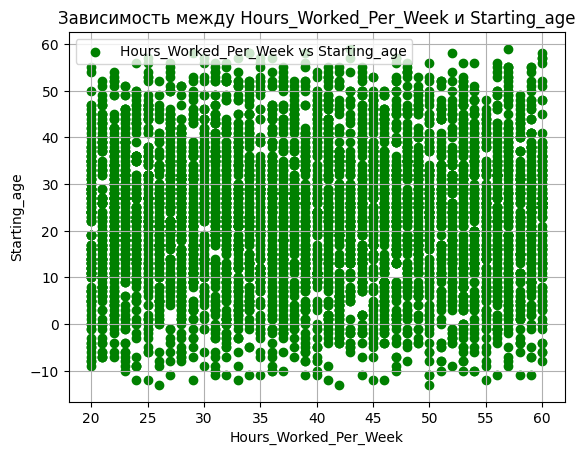

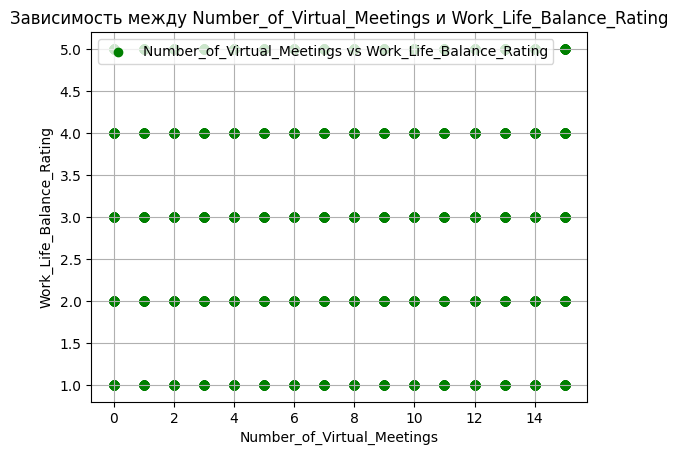

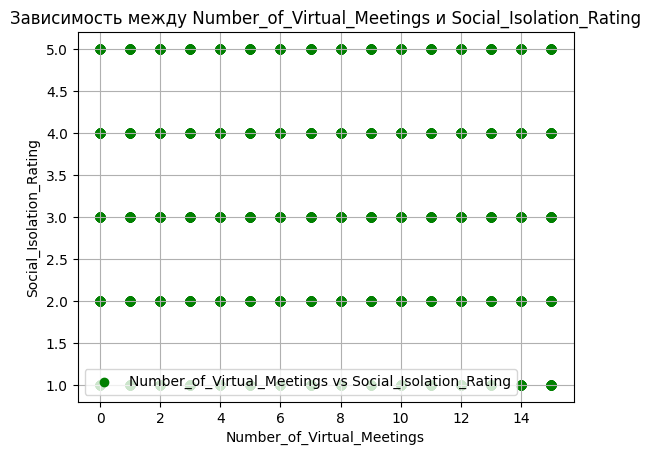

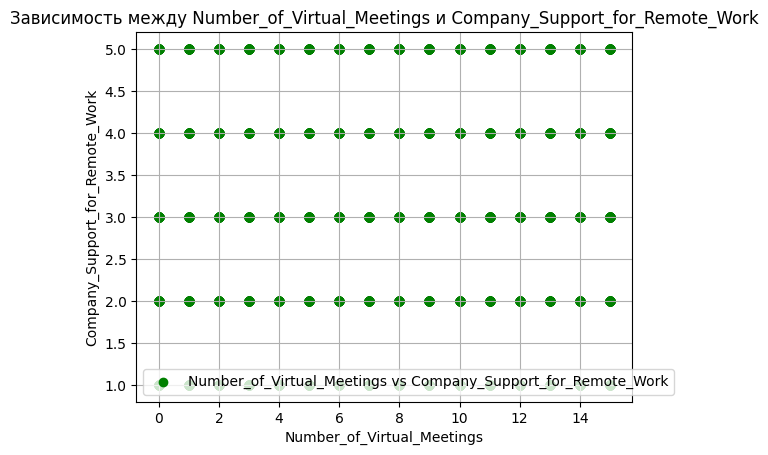

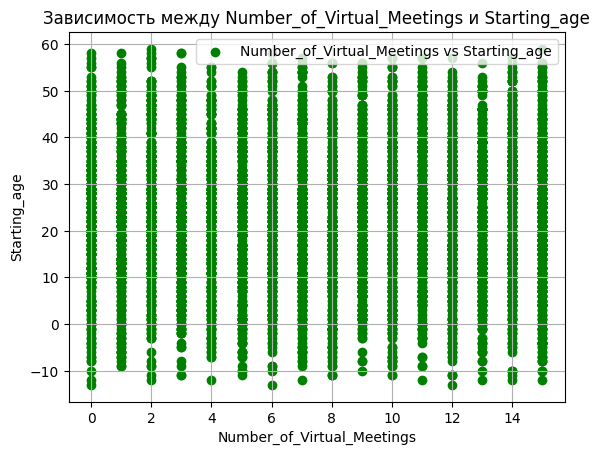

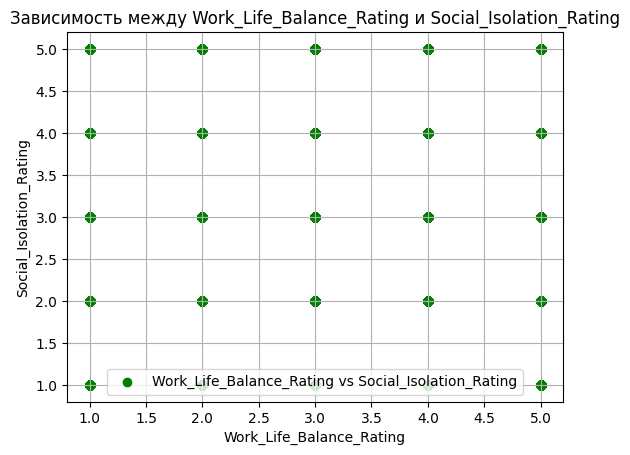

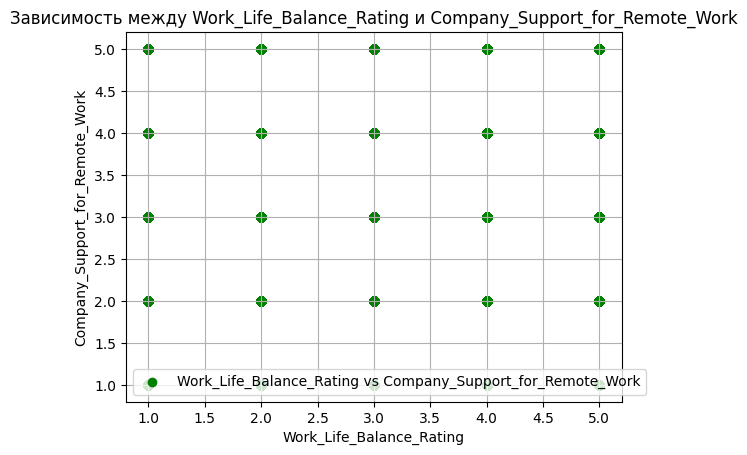

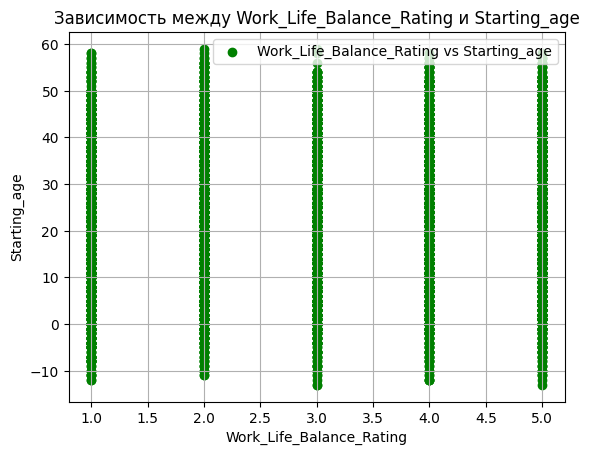

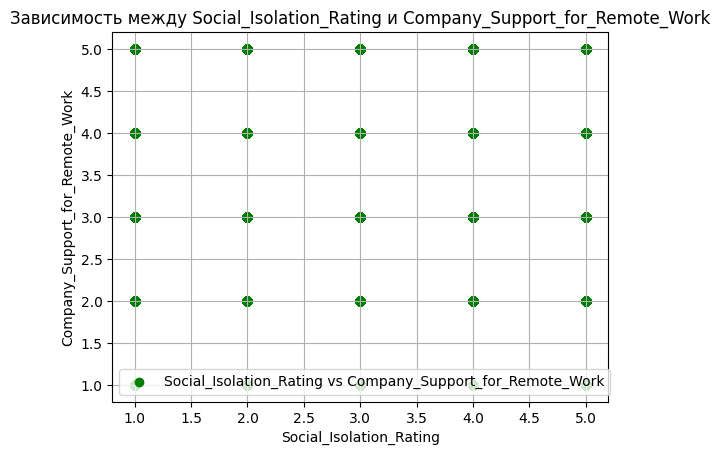

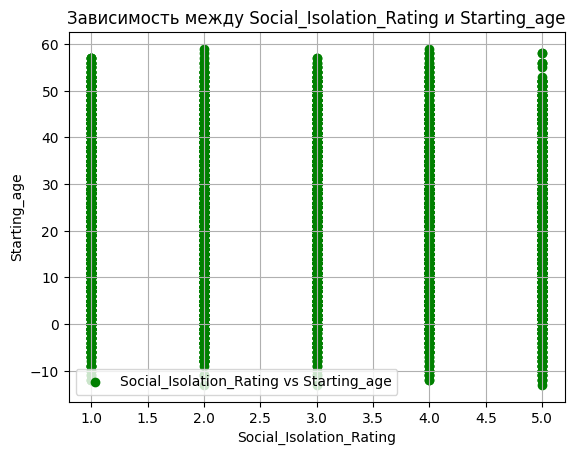

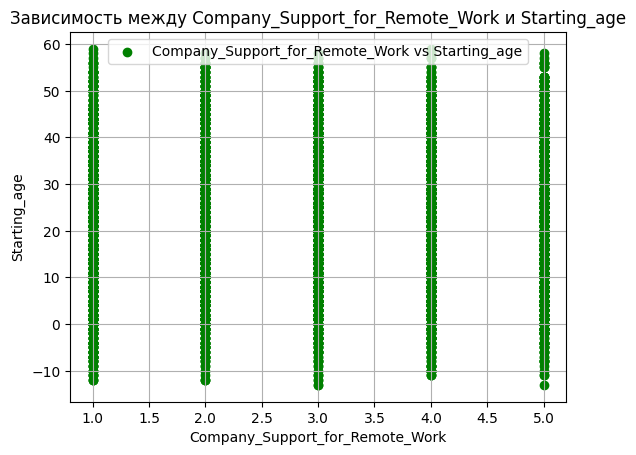

In [14]:
import itertools

plt.figure(figsize=(10, 6))
for (num1, num2) in itertools.combinations(num_list, 2):
    plt.scatter(df[num1], df[num2], label=f'{num1} vs {num2}', color='green')
    plt.xlabel(num1)
    plt.ylabel(num2)
    plt.title(f'Зависимость между {num1} и {num2}')
    plt.legend()
    plt.grid()
    plt.show()